In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

After performing the EDA, signal_data and signal data_labels have been selected.

# Load data

In [ ]:
data = np.load(f'./CWRU_Original_data/signal_data.npy')
labels = np.load(f'./CWRU_Original_data/signal_data_labels.npy')

The time series are labeled from 0 to 9. 

0 is normal operation, while the other labels indicate different faults. 

It is a balanced dataset, each label contains 280 time series.

To carry out the project, the dataset will be artificially unbalanced in order to replicate a more realistic situation. This is due to the fact that in a real case, the time series with normal operation far outweigh the failures produced. 

Two extra datasets will also be obtained. One with the normalized values and the other one applying the furier transform. 

The .npy files will be saved for use during the project. 

# Original: Train 80% Test 20 %

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset to get 20% for test data
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=20)


In [ ]:
# Number of labels in training data
np.unique(y_train, return_counts=True)


In [ ]:
# Number of lables in test data
np.unique(y_test, return_counts=True)


## Unbalance original data

### To unbalance the dataset, 200 samples are selected from label 0 and 20 samples from each of the other labels.

In [ ]:
# Create dataframes
df_x_train = pd.DataFrame(x_train)
df_y_train = pd.DataFrame(y_train)

# Insert labels column in the dataframe
df_x_train.insert(0, 'labels', df_y_train)

# Change labels to int
df_x_train['labels'] = df_x_train['labels'].astype('int')

grouped = df_x_train.groupby('labels')

path_unbalanced_data = './CWRU_preprocess_data/unbalanced_dataset'

# Create forders if they doesn´t exist
os.makedirs(f'{path_unbalanced_data}/unbalanced_npy_by_labels/original_data', exist_ok=True)

for label, group in grouped:
  if label == 0:

    # Create DataFrame with 200 rows of label #0
    df_group = group.iloc[:200,1:]
    np_data = df_group.to_numpy()
    np.save(f'{path_unbalanced_data}/unbalanced_npy_by_labels/original_data/x_train_label{label}_200samples.npy', np_data)

    # Crear array con las etiquetas
    np_labels = np.zeros(200)

  else:
    # For each label, take the first 20 time series
    df_group = group.iloc[:20,1:]
    np_group = df_group.to_numpy()
    np.save(f'{path_unbalanced_data}/unbalanced_npy_by_labels/original_data/x_train_label{label}_20samples.npy', np_group)

    # Concatenate dataframes
    np_data = np.concatenate((np_data, np_group), axis=0)

    np_nlabels = np.full(20, label)
    np_labels = np.concatenate((np_labels, np_nlabels), axis=None)

np.save(f'{path_unbalanced_data}/x_train_unbalanced.npy', np_data)
np.save(f'{path_unbalanced_data}/y_train_unbalanced.npy', np_labels)

In [ ]:
def plot(data, label):
  # Graficar el espectro de frecuencia
  plt.figure(figsize=(20, 5))
  
  for fila in data:
    plt.plot(list(range(0, len(fila))), fila, alpha=0.2, color='Blue')
    
  plt.title(f'Label: {label}')
  plt.xlabel("Sample")
  plt.ylabel("Value")
  plt.grid()
  plt.show()

In [ ]:
# Plot 0 label example data
data_plot = np.load(f'{path_unbalanced_data}/unbalanced_npy_by_labels/original_data/x_train_label0_200samples.npy')
plot(data_plot[:20], 0)

In [ ]:
# Plot labels with errors
for label in list(range(1,10)):
    data_plot = np.load(f'{path_unbalanced_data}/unbalanced_npy_by_labels/original_data/x_train_label{label}_20samples.npy')
    plot(data_plot, label)

## Unbalanced normalized data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))

x_train_norm = []
for row in x_train:
  # Reshape for min_max_escaler
  row = row.reshape(-1, 1)
  # Apply min_max_scaler
  fila_min_max = min_max_scaler.fit_transform(row)
  # Flatten vector
  fila_min_max = fila_min_max.flatten()
  # Add to array
  x_train_norm.append(fila_min_max)

x_train_norm = np.array(x_train_norm)

x_test_norm = []
for row in x_test:
  # Reshape for min_max_escaler
  row = row.reshape(-1, 1)
  # Apply min_max_scaler
  fila_min_max = min_max_scaler.fit_transform(row)
  # Flatten vector
  fila_min_max = fila_min_max.flatten()
  # Add to array
  x_test_norm.append(fila_min_max)

x_test_norm = np.array(x_test_norm)


In [ ]:
# Create dataframes
df_x_train_norm = pd.DataFrame(x_train_norm)
df_y_train = pd.DataFrame(y_train)

# Insert column labels in the dataframe
df_x_train_norm.insert(0, 'labels', df_y_train)

# Change labels to int
df_x_train_norm['labels'] = df_x_train_norm['labels'].astype('int')

grouped = df_x_train_norm.groupby('labels')

# Create forders if they doesn´t exist
os.makedirs(f'{path_unbalanced_data}/unbalanced_npy_by_labels/normaliced_data', exist_ok=True)


for label, group in grouped:
  if label == 0:

    # Create DataFrame with 200 rows of label nº0
    df_group = group.iloc[:200,1:]
    np_data = df_group.to_numpy()
    np.save(f'{path_unbalanced_data}/unbalanced_npy_by_labels/normaliced_data/x_train_norm_label{label}_200samples.npy', np_data)

    # Create array with labels
    np_labels = np.zeros(200)

  else:
    # Dataframe with the first 20 rows of each label
    df_group = group.iloc[:20,1:]
    np_group = df_group.to_numpy()
    np.save(f'{path_unbalanced_data}/unbalanced_npy_by_labels/normaliced_data/x_train_norm_label{label}_20samples.npy', np_group)

    # Concatenate dataframes
    np_data = np.concatenate((np_data, np_group), axis=0)

    np_nlabels = np.full(20, label)
    np_labels = np.concatenate((np_labels, np_nlabels), axis=None)

np.save(f'{path_unbalanced_data}/x_train_norm_unbalanced.npy', np_data)
np.save(f'{path_unbalanced_data}/y_train_norm_labels_unbalanced', np_labels)

In [ ]:
# Plot 0 label example data
data_plot = np.load(f'{path_unbalanced_data}/unbalanced_npy_by_labels/normaliced_data/x_train_norm_label0_200samples.npy')
plot(data_plot[:20], 0)

In [ ]:
# Plot labels with errors
for label in list(range(1,10)):
    data_plot = np.load(f'{path_unbalanced_data}/unbalanced_npy_by_labels/normaliced_data/x_train_norm_label{label}_20samples.npy')
    plot(data_plot, label)

## Unbalanced fourier data

In [ ]:
from scipy.fft import fft, fftfreq

sampling_frequency = 48000

# Fourier transform using scipy
x_train_fourier = []
for row in x_train:
  # fft_result is a complex number
  fft_result = fft(row)
  # List of frequencies from 0 to 24000 and -24000 to 0-> array([ 0., 30., 60., ..., -90., -60., -30.]) is used for plotting
  frequencies = np.array(fftfreq(len(fft_result), 1/sampling_frequency))

  # Using the absolute value of the complex number
  fft_result_abs = np.abs(fft_result)
  x_train_fourier.append(fft_result_abs)

x_train_fourier = np.array(x_train_fourier)


# Fourier transform using scipy
x_test_fourier = []
for row in x_test:
  # fft_result is a complex number
  fft_result = fft(row)

  # List of frequencies from 0 to 24000 and -24000 to 0-> array([ 0., 30., 60., ..., -90., -60., -30.]) is used for plotting
  frequencies = np.array(fftfreq(len(fft_result), 1/sampling_frequency))

  # Using the absolute value of the complex number
  fft_result_abs = np.abs(fft_result)
  x_test_fourier.append(fft_result_abs)

x_test_fourier = np.array(x_test_fourier)

In [ ]:
# Sort graph 

def reorder(data):
  np_reordered = []
  for fila in data:
    first_half = fila[:800]
    second_hand = fila[800:]
    fila_reordenada = np.concatenate((second_hand, first_half), axis=None)
    np_reordered.append(fila_reordenada)

  return np_reordered

x_train_fourier_reordered = reorder(x_train_fourier)
x_test_fourier_reordered = reorder(x_test_fourier)

In [ ]:
# Create dataframes
df_x_train_fourier = pd.DataFrame(x_train_fourier_reordered)
df_y_train = pd.DataFrame(y_train)

# Insertar column labels in the dataframe
df_x_train_fourier.insert(0, 'labels', df_y_train)

# Change labels to int
df_x_train_fourier['labels'] = df_x_train_fourier['labels'].astype('int')

grouped = df_x_train_fourier.groupby('labels')

# Create forders if they doesn´t exist
os.makedirs(f'{path_unbalanced_data}/unbalanced_npy_by_labels/fourier_data', exist_ok=True)

for label, group in grouped:
  if label == 0:

    # Create DataFrame with 200 rows of label nº0
    df_group = group.iloc[:200,1:]
    np_data = df_group.to_numpy()
    np.save(f'{path_unbalanced_data}/unbalanced_npy_by_labels/fourier_data/x_train_fourier_label{label}_200samples.npy', np_data)

    # Create array with labels
    np_labels = np.zeros(200)

  else:
    # Dataframe with first 20 rows of each label
    df_group = group.iloc[:20,1:]
    np_group = df_group.to_numpy()
    np.save(f'{path_unbalanced_data}/unbalanced_npy_by_labels/fourier_data/x_train_fourier_label{label}_20samples.npy', np_group)

    # Concatenate dataframes
    np_data = np.concatenate((np_data, np_group), axis=0)

    np_nlabels = np.full(20, label)
    np_labels = np.concatenate((np_labels, np_nlabels), axis=None)

np.save(f'{path_unbalanced_data}/x_train_fourier_unbalanced.npy', np_data)
np.save(f'{path_unbalanced_data}/y_train_fourier_labels_unbalaced', np_labels)

In [24]:
first_half = frequencies[:800]
second_hand = frequencies[800:]
reordered_frecuencies = np.concatenate((second_hand, first_half), axis=None)

In [52]:
def plot_fourier(data, label):
  # Graficar el espectro de frecuencia
  plt.figure(figsize=(20, 5))
  for row in data:
    plt.plot(reordered_frecuencies,row, 'b', alpha=0.2)
    
  plt.title(f'Fourier; Label: {label}')
  plt.xlabel("Frecuencia Hz")
  plt.ylabel("Amplitud")
  plt.grid()
  plt.show()

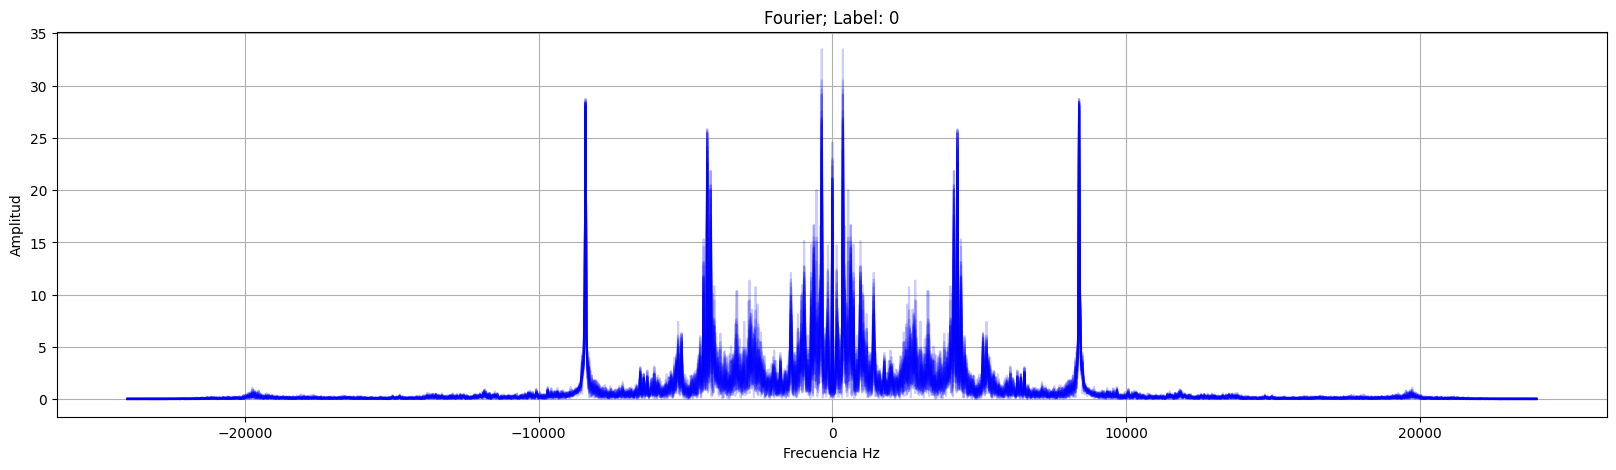

In [53]:
# Plot 0 label example data
data_plot = np.load(f'{path_unbalanced_data}/unbalanced_npy_by_labels/fourier_data/x_train_fourier_label0_200samples.npy')
plot_fourier(data_plot[:20], 0)

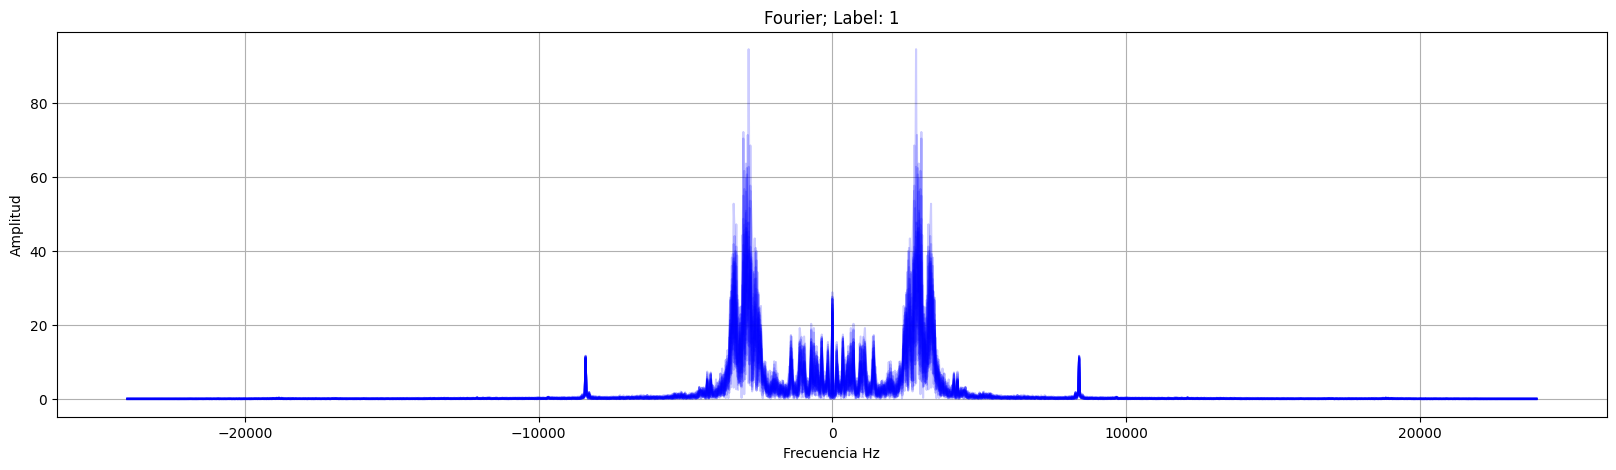

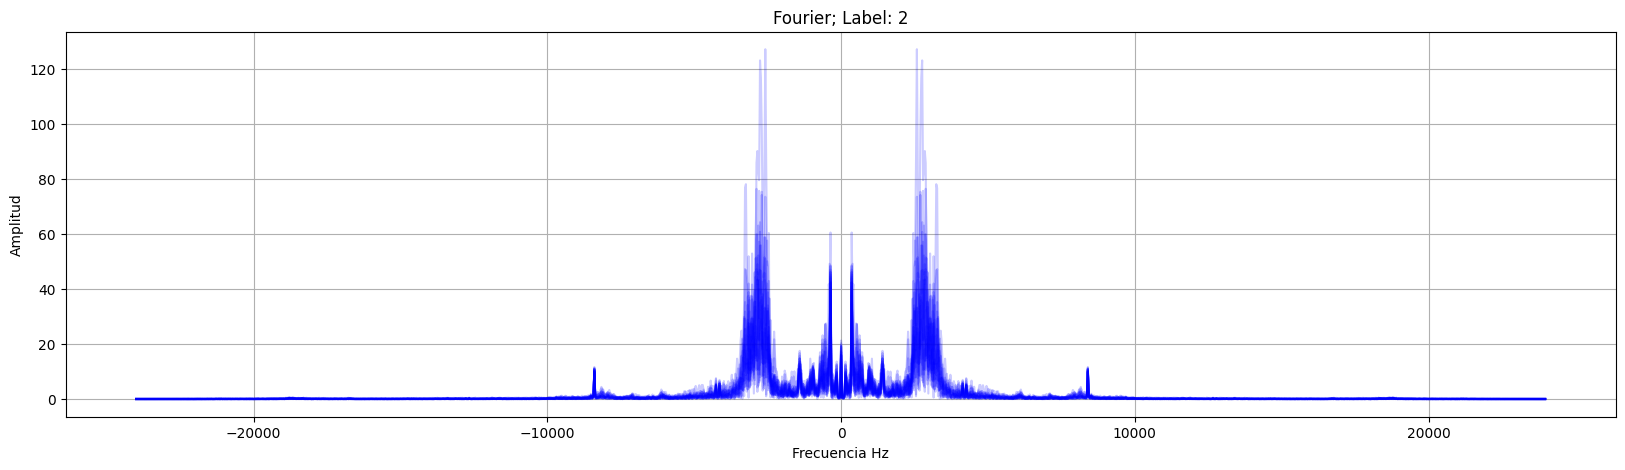

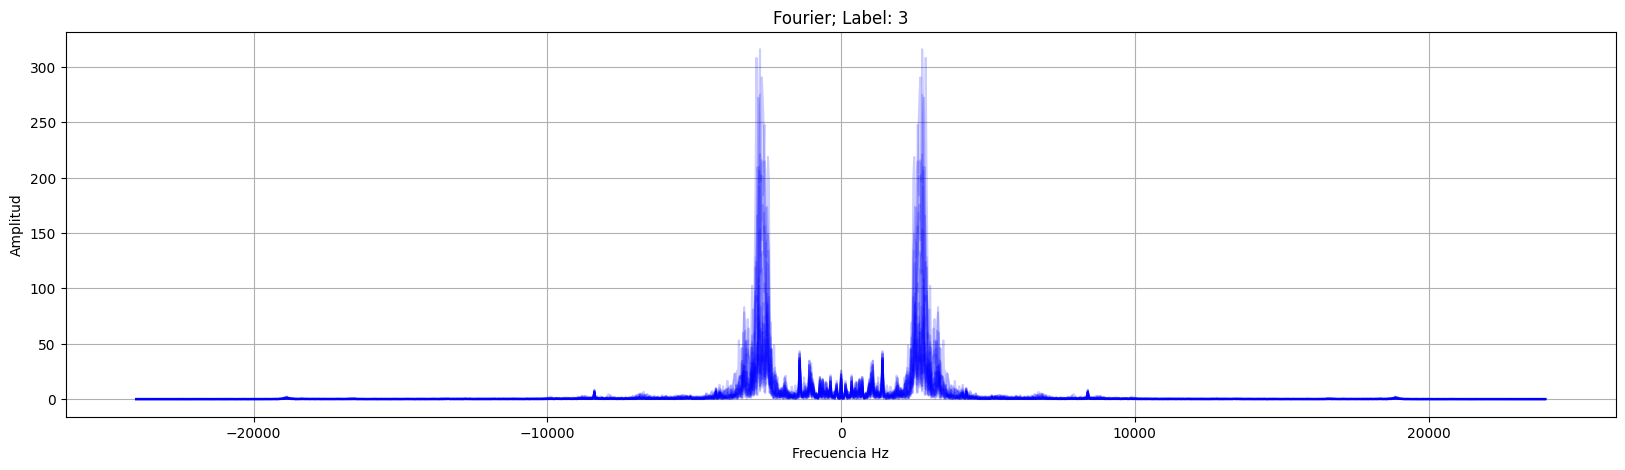

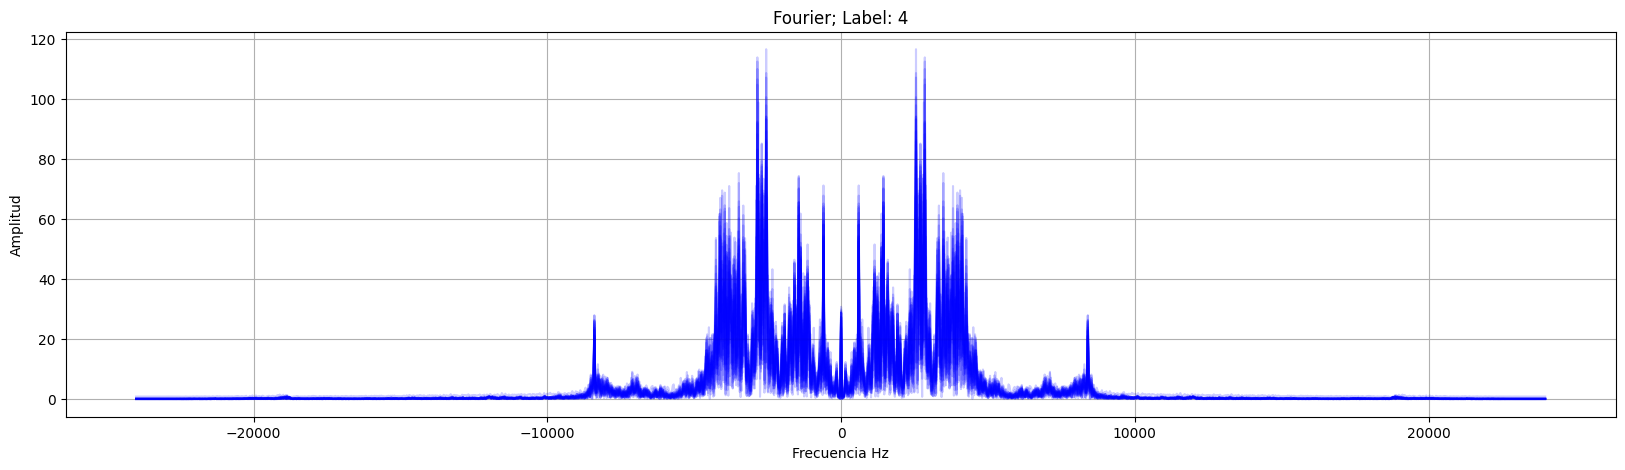

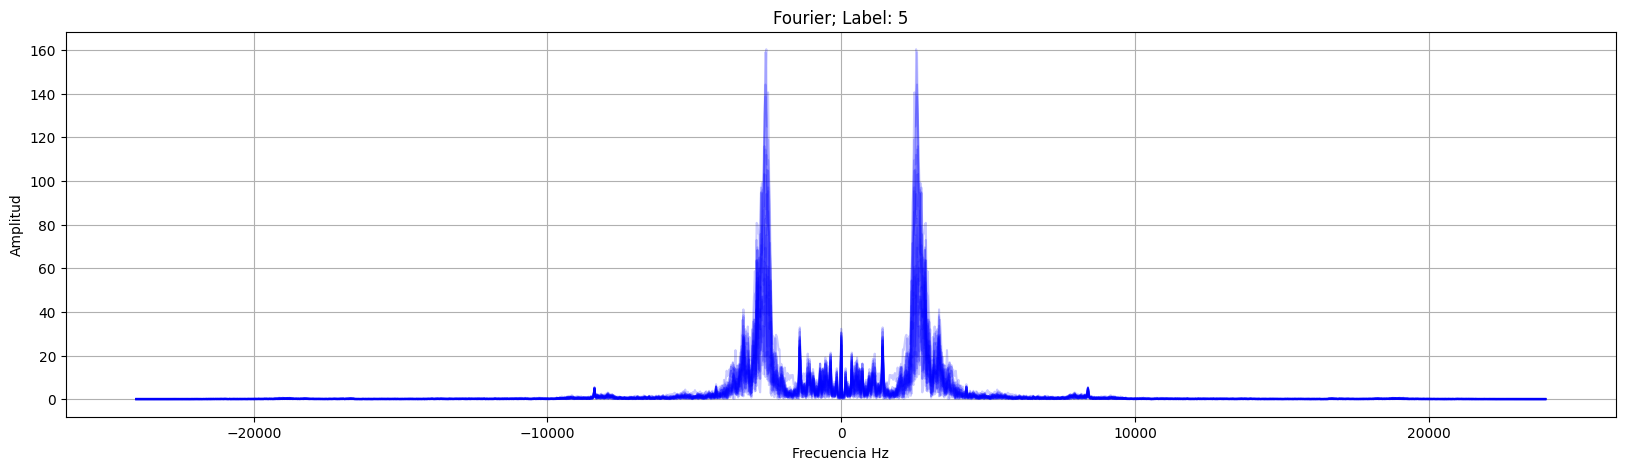

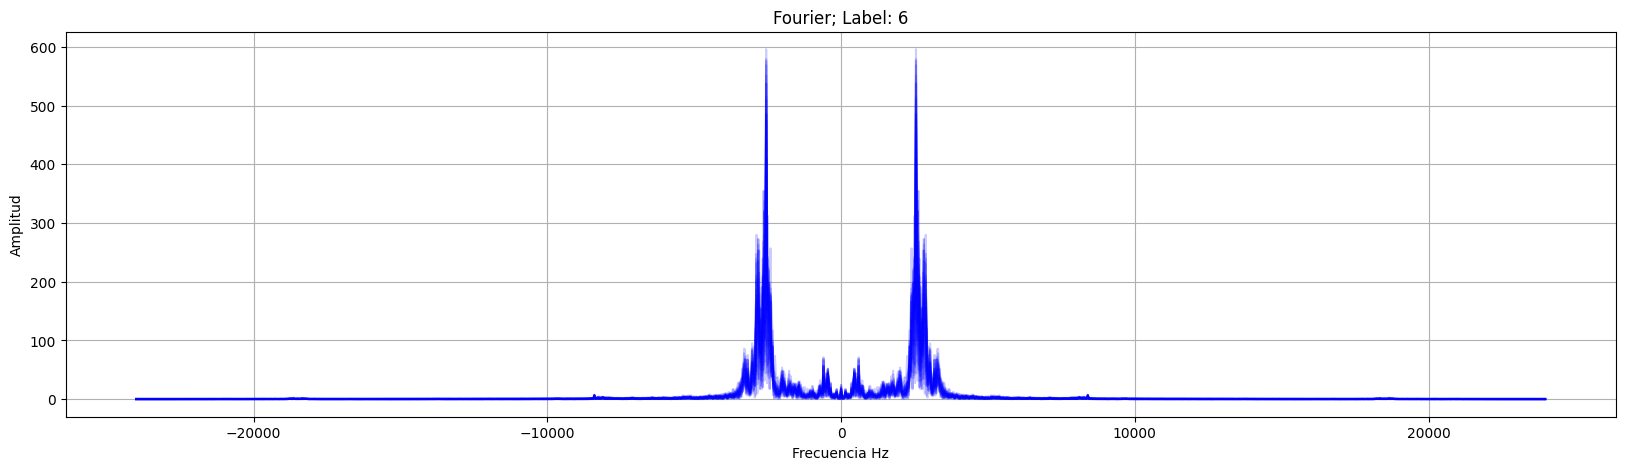

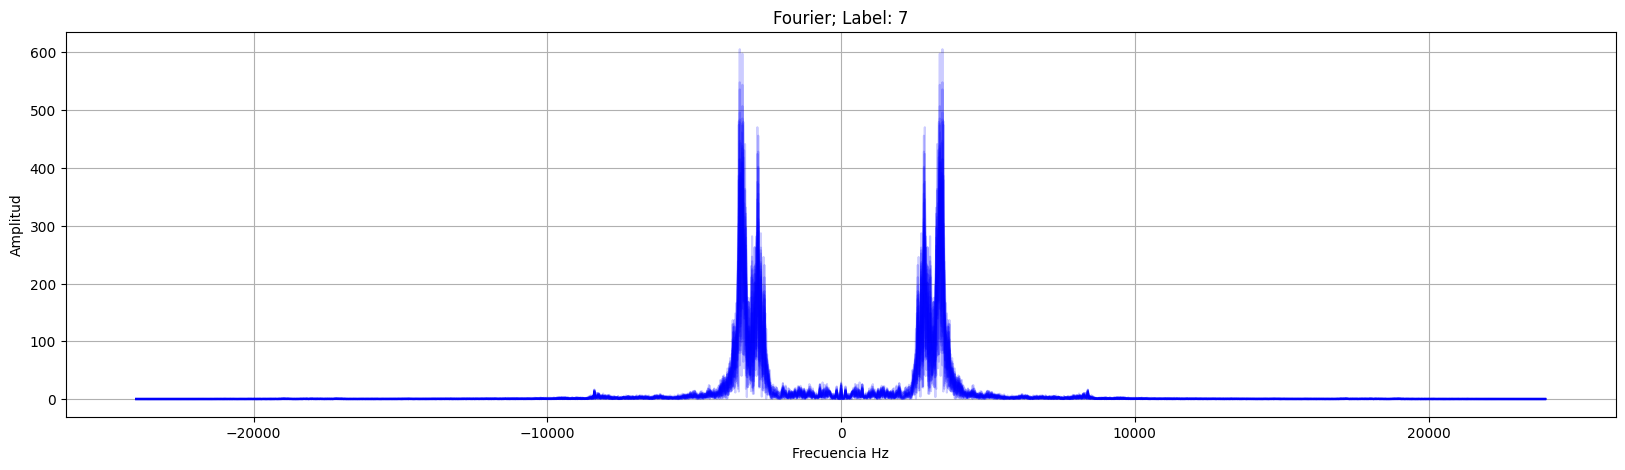

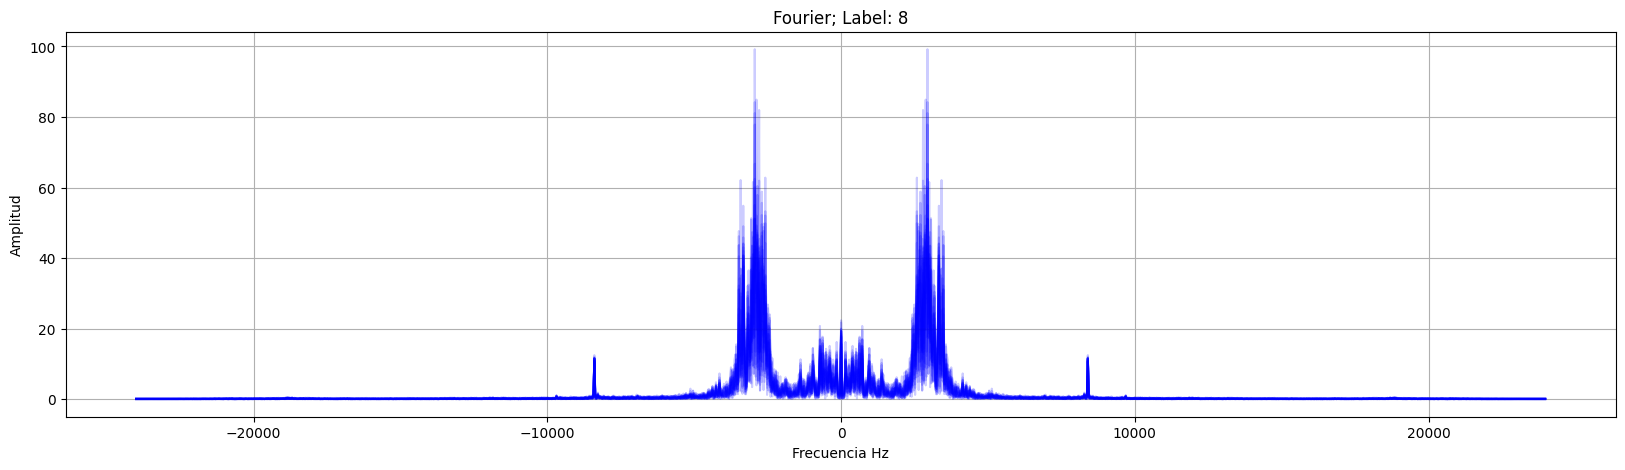

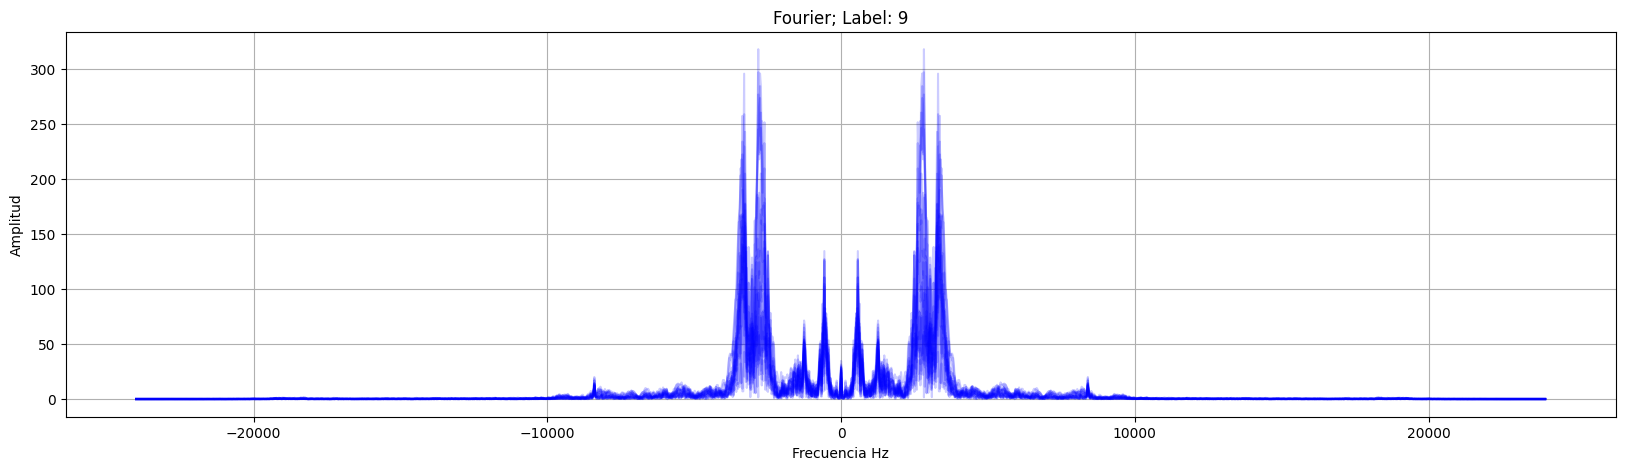

In [54]:
# Plot labels with errors
for label in list(range(1,10)):
    data_plot = np.load(f'{path_unbalanced_data}/unbalanced_npy_by_labels/fourier_data/x_train_fourier_label{label}_20samples.npy')
    plot_fourier(data_plot, label)